In [9]:
import os
os.getcwd()

'C:\\Users\\chy_z\\TitanicDataAnalysis'

In [10]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')  # Assuming the file is named 'train.csv'

# Display the first few rows to verify
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
print(train_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Fill missing values in the 'Age' column with the median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Fill missing values in the 'Embarked' column with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Drop the 'Cabin' column if it exists
if 'Cabin' in train_data.columns:
    train_data.drop('Cabin', axis=1, inplace=True)


In [14]:
# Verify missing values are handled
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
import sklearn
print(sklearn.__version__)


1.5.2


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Encode categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})  # Label encoding for Sex
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)  # One-hot encoding for Embarked

# 2. Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']

# 3. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [18]:
# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

      Feature  Importance
5        Fare    0.273568
1         Sex    0.268369
2         Age    0.253454
0      Pclass    0.080003
3       SibSp    0.054522
4       Parch    0.037680
7  Embarked_S    0.022740
6  Embarked_Q    0.009663


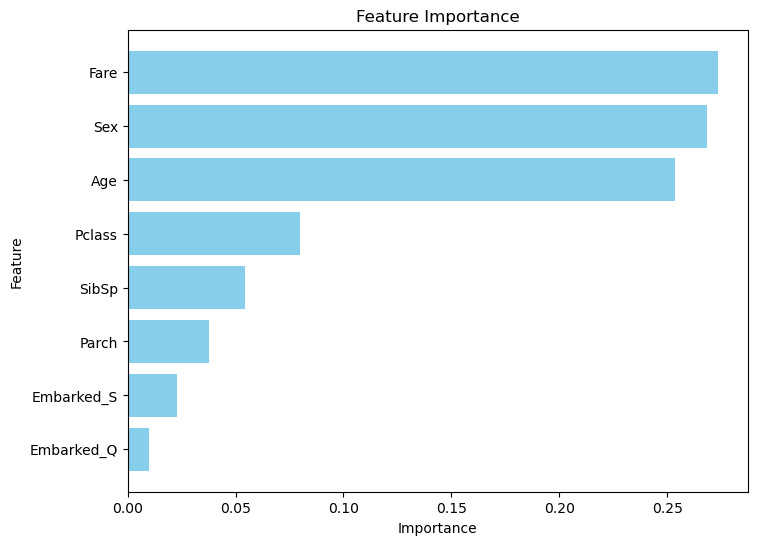

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To show the most important feature on top
plt.show()


In [23]:
# Step 1: Load the test dataset
test_data = pd.read_csv('test.csv')  # Assuming the test dataset file is named 'test.csv'

# Step 2: Preprocess the test dataset
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())  # Fill missing 'Age'
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].median())  # Fill missing 'Fare'
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# Ensure the test data has the same columns as the training data
test_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X_test = test_data[test_features]

# Step 3: Make predictions
test_data['Survived'] = model.predict(X_test)  # Predict survival for test dataset

# Step 4: Create the submission file
submission = test_data[['PassengerId', 'Survived']]  # Select only PassengerId and Survived columns
submission.to_csv('submission.csv', index=False)  # Save the submission file as 'submission.csv'

print("Submission file created: submission.csv")


Submission file created: submission.csv
